<div align=right>
Bhavya Pandey<br>
</div>

<h1 align=center>Data Modelling: Time Series Analysis</h1>

<font color='darkblue'> <h2>Learning Objectives</h2> </font>

* Achieve an introductory exposure to carrying out time series analysis using 'statsmodels' library in Python
* Particularly, understand the seasonality and trend of a series by removing the noise
* Decompose a time series through two model types: an additive model and a multiplicative model
* Implement the analysis, read the results, and gather insights

<font color='darkblue'> <h2> Introduction to Time Series Analysis </h2> </font>

**Time series analysis** is a specific way of analyzing a sequence of data points collected over an interval of time. What sets time series data apart from other data is that the analysis can show how variables change over time. 

Time series analysis typically requires a large number of data points to ensure consistency and reliability. 

An extensive data set ensures we have a representative sample size and that analysis can cut through noisy data. It also ensures that any trends or patterns discovered are not outliers and can account for **seasonal variance**. Additionally, time series data can be used for **forecasting or predicting future data based on historical data**.

<font color='darkblue'> <h2> Using 'statsmodels' for Time Series Analysis </h2> </font>

So far, we have been exposed to using the `statsmodel` library in python to undertake data modelling tasks, and carrying out statistical analyses. 

The `statsmodel.tsa` functionality in this library allows us to use trends in data to understand it better and decompose it across time periods to gather more information.

In this mini-lecture, we explore the **monthly Airplane Passenger Data** from 1949 to 1960 and undertake some time-series analysis on it.

<font color='darkblue'> <h2> Load libraries and Pre-processing Data </h2> </font>

In [ ]:
# importing the necessary libraries 
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# reading the data using pandas
fname = 'international-airline-passengers.csv'
data = pd.read_csv(fname)
data = data.rename(columns= {'Month;"Passengers"': 'MonthPass'})
data.head(10)

In [ ]:
# pre-processing and cleaning the data
'''
functions to split the two columns in the dataframe according to time 
and passenger information 
input: specified columns of the dataset 
output: cleaned columns according to specifications
'''
def splt2(x):
    return x.split(';')[0]
def splt(x):
    return x.split(';')[1]

data['month'] = data.apply(lambda x: splt2(x.MonthPass), axis = 1)
data['passengers'] = data.apply(lambda x: splt(x.MonthPass), axis = 1)

# dropping the additonal column
data.drop(['MonthPass'], inplace = True, axis = 1)
data

In [ ]:
# checking the data for null values 
data.isnull().sum()

In [ ]:
# changing the data type of the 'months' column to 'datetime' type
data['month'] = pd.to_datetime(data['month'])
data['month'].dt.year.head()

In [ ]:
# checking the datatypes of the columns 
data.dtypes

In [ ]:
# changing the datatype of the 'passengers' column to 'int'
data['passengers'] = data['passengers'].astype(int)

In [ ]:
# setting the 'months' column as the index for the dataframe to allow 
# easy plotting and access to the time data for analysis
data = data.set_index('month')
data.head()

<font color='darkblue'> <h2> Preliminary Analysis </h2> </font>

To begin our preliminary analysis of the time-series data, we begin with simply visualising the data in its simplest form. 

Here, we can notice a few things about our data. **We invite you all to put forth your views/observations about the following aspects of our first visualization:**

- The general trend of the data over time
- The variability in this trend of the data (regular? irregular?
- Any other observation that comes to mind...

In [ ]:
# preliminary visualization of the data
data.plot(grid = 'on')

**Now, let us further explore these observations by narrowing down our visualization...**

In [ ]:
# observing data of consecutive years over the same time period 
start_date = datetime(1959, 1, 1)
end_date = datetime(1960, 12, 1)
data[(start_date <= data.index) & (data.index <= end_date)].plot(grid = 'on')

**What can be observed about the seasonal trend in data here?**

<font color='darkblue'> <h2> Time-Series Decomposition  </h2> </font>

**Time series decomposition** is a mathematical procedure which transforms a time series into multiple different time series. The original time series is often split into 3 component series:

**Seasonal:** Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.

**Trend:** The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.

**Random:** Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.

<font color='darkblue'> <h2> Additive versus Multiplicative Decomposition </h2> </font>

To achieve successful decomposition, it is important to choose between the additive and multiplicative models, which requires analyzing the series. 

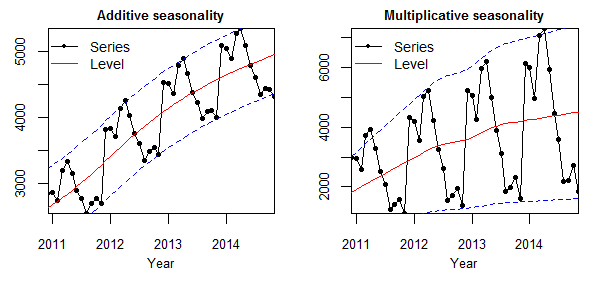

The additive model and multiplicative model are **generalizations of the “usual” linear regression model** (Hastie & Tibshirani, 1990).

**ADDITIVE MODEL**

The additive model is the arithmetic sum of the predictor variables‘ individual effects. For a two factor experiment (X, Y), the additive model can be represented by:

$ Y = B0 + B1 X1 + B2 X2 + ε $

Synthetically it is a model of data in which the **effects of the individual factors are differentiated and added to model the data**. In the additive model, the behavior is linear where changes over time are consistently made by the same amount, like a linear trend. In this situation, **the linear seasonality has the same amplitude and frequency**.

**MULTIPLICATIVE MODEL**

Similarly, a multiplicative model can be represented by:

$ Y = B0 * B1 X1 * B2 X2 + ε $

In this situation, trend and seasonal components are **multiplied and then added to the error component**. It is not linear, can be exponential or quadratic and represented by a curved line. Their advantage is that they are more flexible than linear models, but keep many of the desirable properties of their linear counterparts (Shalizi, 2015). Different from the additive model, the multiplicative model has an **increasing or decreasing amplitude and/or frequency over time**.



This rationale can be applied to different time periods instead of individual effects to create and study the time-series models.

In general, this can be expressed simply as: 

**Y(t) = Trend(t) + Seasonality(t) + Residual(t) for the additive model**

<font color='darkblue'> <h2> Additive or Multiplicative? </h2> </font>

As evidenced in teh comparison above, the additive model does not vary in frequency and amplitude over time. The multiplicative model does. In the example below, for the second model, the behavior acts as an increasing funnel (which may even be decreasing) as we considered the multiplicative case.

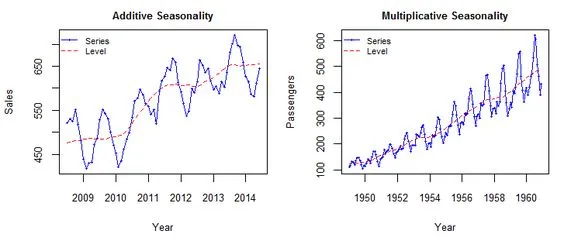

So, this discussion boils down to a key question: **when do we use additive versus multiplicative models?**

In general: we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. On other hand, we adapt the the additive model when the magnitude of seasonality does not change in relation to time.

**For the purpose of this mini-lecture, we will try and run both the models on the dataset -- to observe and analyse the difference in results. However, since the magnitude of the seasonality in the data remains more or less constant, the ADDITIVE MODEL would be best-suited for the time-series analysis of this data.**

In [ ]:
# calling the 'statsmodels.tsa' library to plot the decomposed time series 
decomposition = sm.tsa.seasonal_decompose(data, model = 'additive')
fig = decomposition.plot()

**What do each of these graphs mean?**

*Level: is the average value in the series.*

*Trend: is the increasing or decreasing value in the series.*

*Seasonality: is the repeating the short-term cycle in the series.*

*Noise/Resid: is the random variation in the series.*

Another important aspect in time-series analysis, which is usefult to know about is **stationarity**. A time series has stationarity when the observations are not dependent on the time. Statistical properties of these time series will not change with time thus they will have constant mean, variance, and covariance. This difference can be visualized as follows:

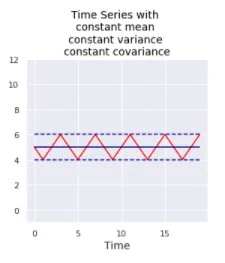

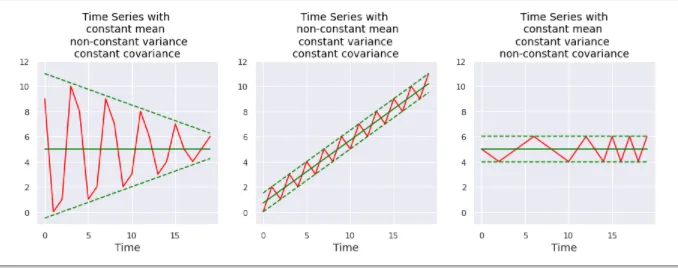

In [ ]:
# calling the 'statsmodels.tsa' library to plot the decomposed time series
decomposition = sm.tsa.seasonal_decompose(data, model = 'multiplicative')
fig = decomposition.plot()

Here, the key noticeable difference between the analysis of the two models is in the **residuals** plot.

**Let us discuss why this may be the case, based on our understanding of residuals so far...**

<font color='darkblue'> <h2> Bringing all the elements together...  </h2> </font>

Let us now proceed to finally plot the series data with the trend analysis line we obtained using the additive model.

In [ ]:
# we use this hack to double up the default plot size
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [ ]:
# calling matplotlib to use create the plots using the decomposition above
fig, ax = plt.subplots()
ax.grid(True)

# defining the month of 'January' as the major locator and each 'quarter or three months'
    # as the minor locator, we set the formats for our plot
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

# defining the grids and axes for the plot
ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

# plotting the whole dataset using the index in 'blue'
plt.plot(data.index, data['passengers'], c = 'blue', label = 'data')

# plotting the decomposition trend in 'red'
plt.plot(decomposition.trend.index, decomposition.trend, c='red', label = 'trend line')
plt.title("Data versus Decomposed Time Trend Line Plot")
plt.xlabel("Time")
plt.ylabel("Number of Air Passengers in Thousands")
leg = ax.legend()

**And, we're all done! This decomposed trend line juxtaposed with the data gives us a true impression of how the number of air passengers changed over time in the 1949 to 1960 time period.**

<font color='darkblue'> <h2> Forecasting Using Time-Series Analysis </h2> </font>

There are many extended uses of carrying out Time-Series Analysis such as using them for forecasting future values. 

**Autoregressive Integrated Moving Averages (ARIMA)** and **Exponential Moving Averages (EMA)** are two common methods for forecasting based on time series data.

Just as a primer to this, let us run an Auto Regressive Model on our data.

In [ ]:
# For non-seasonal data 

model=ARIMA(data['passengers'],order=(1,1,1)) 
    #p=1 (AR specification), d=1 (Integration order), q=0 or 1 (MA specification/polynomial)
model_fit=model.fit()

model_fit.summary()

<h3> Feel free to explore this further using the resources detailed below! </h3>

<font color='darkblue'> <h2> Further resources  </h2> </font>

- Refer to the time-series analysis documentation of the `statsmodels` package [here](https://www.statsmodels.org/stable/tsa.html).
- Find some practical knowledge on time-series analysis, its types and common techniques, and when it is used using [this](https://www.tableau.com/learn/articles/time-series-analysis) resource.
- Find corresponding statistical models for quantitative time-series analysis including forecasting [here](https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/).
- Also find some statistical tools for time-series analysis [here](https://builtin.com/data-science/time-series-python).

<font color='darkblue'> <h2> References </h2> </font>

- Hastie, T. & Tibshirani, R. (1990). Generalized Additive Models. Chapman and Hall/CRC
- Shalizi, C. (2015). Chapter 9: Additive Models. Retrieved February 17, 2022 from: https://www.stat.cmu.edu/~cshalizi/uADA/15/lectures/10.pdf
- Tibshirani, R. (2014). Additive Models. Advanced Methods for Data Analysis (36-402/36-608). Retrieved February 17, 2022 from: https://www.stat.cmu.edu/~ryantibs/advmethods/notes/addmodels.pdf
- Time-Series Analysis in Python, from: https://www.simplilearn.com/tutorials/python-tutorial/time-series-analysis-in-python
- What is Stationarity in Time Series? How it can be detected? from: https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-7e5dfa7b5f6b
- Practical Guide for Time Series Analysis with Pandas, from: https://towardsdatascience.com/practical-guide-for-time-series-analysis-with-pandas-196b8b46858f